In [56]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")



In [57]:
# Load and & Inspect Data
df = pd.read_csv("rolling_stones_spotify.csv")

print(df.head())



   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy 

In [58]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [59]:
print(df.duplicated().sum())


0


In [60]:
print(df.isnull().sum())

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


In [61]:
# Drop duplicates and irrelevant columns
cols_to_drop = ['id', 'uri', 'name', 'release_date']
df_clean = df.drop(columns=cols_to_drop).drop_duplicates()

In [62]:
# Handle Outliers and Missing Values
# Remove rows with missing values
print("Missing values before:", df_clean.isnull().sum().sum())
df_clean = df_clean.dropna()
print("Missing values after:", df_clean.isnull().sum().sum())

Missing values before: 0
Missing values after: 0


In [63]:
# Feature Engineering & EDA
# Popular albums with most popular songs
popular_threshold = 70
popular_songs = df[df['popularity'] >= popular_threshold]
album_counts = popular_songs['album'].value_counts().head(5)

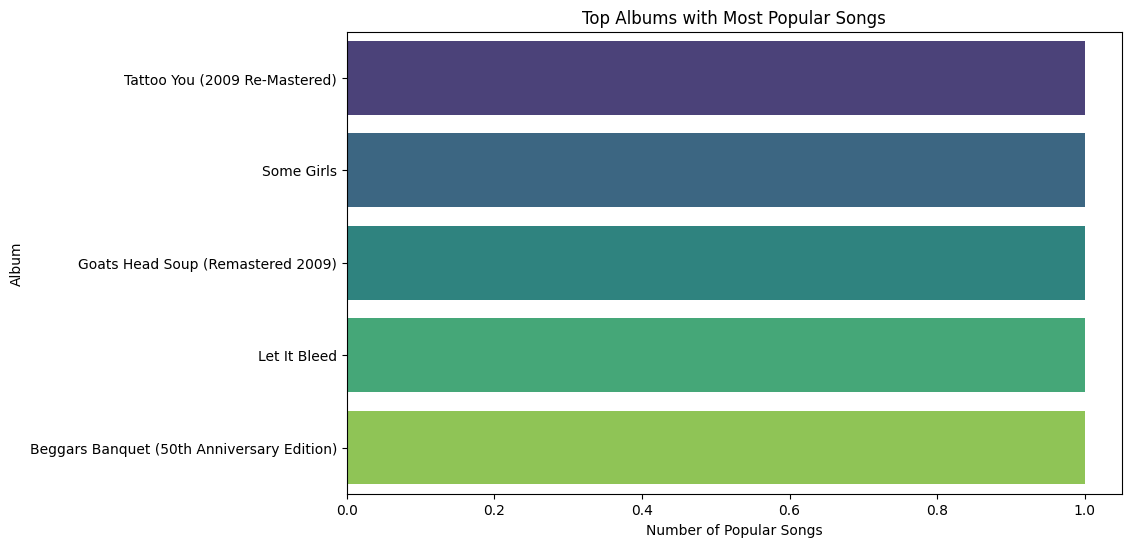

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=album_counts.values, y=album_counts.index, palette='viridis')
plt.title("Top Albums with Most Popular Songs")
plt.xlabel("Number of Popular Songs")
plt.ylabel("Album")
plt.show()

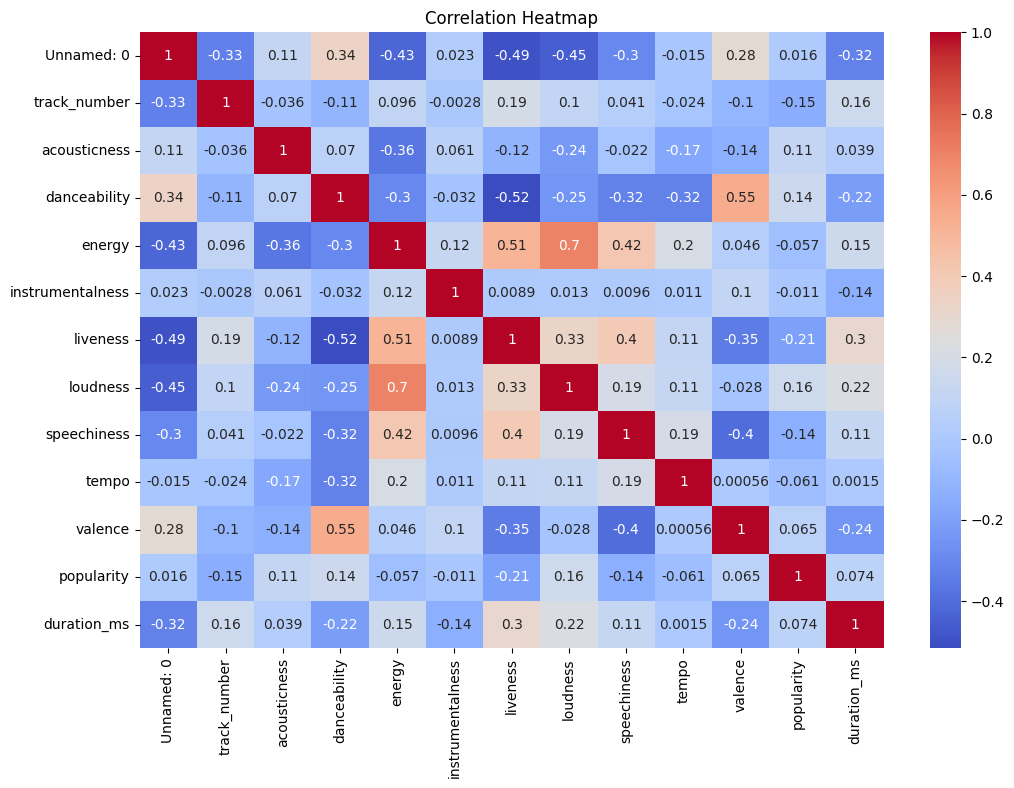

In [65]:
# Correlation between popularity and other numerical features
plt.figure(figsize=(12, 8))
numeric_cols = df_clean.select_dtypes(include=[np.number])  # Only numeric data
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

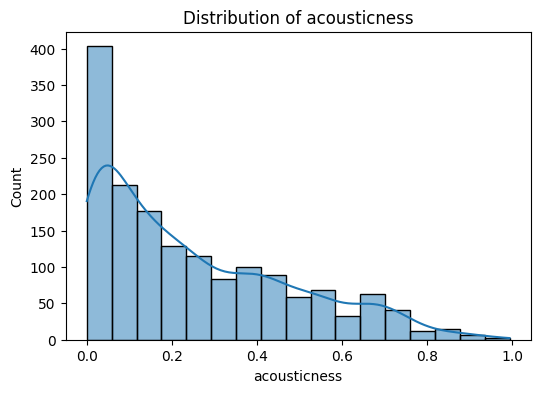

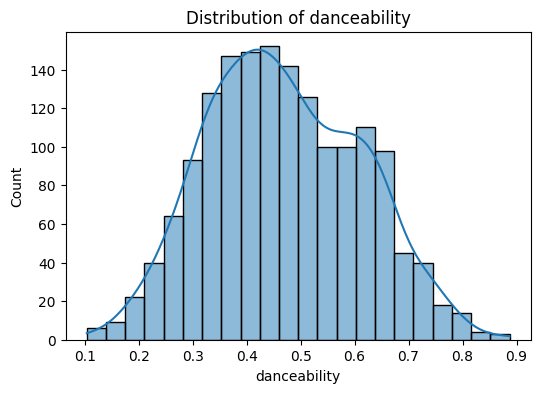

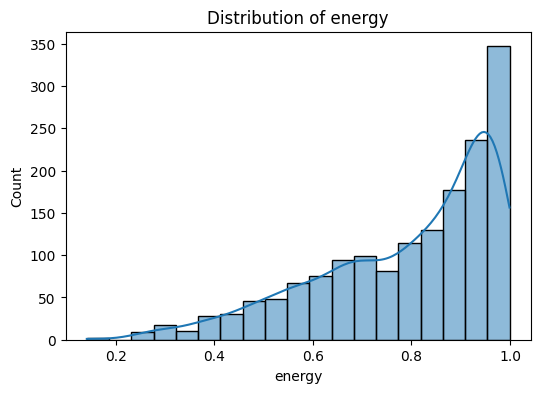

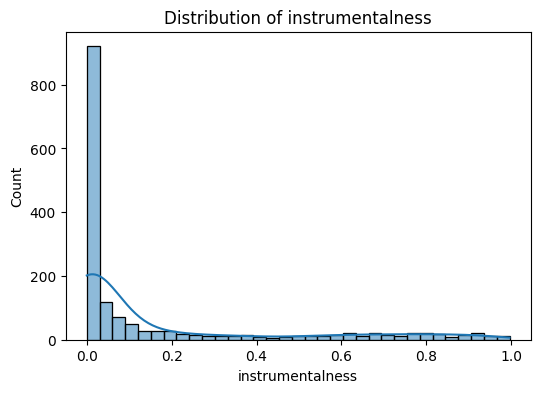

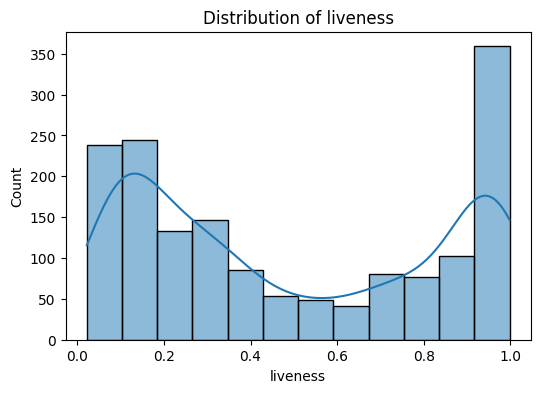

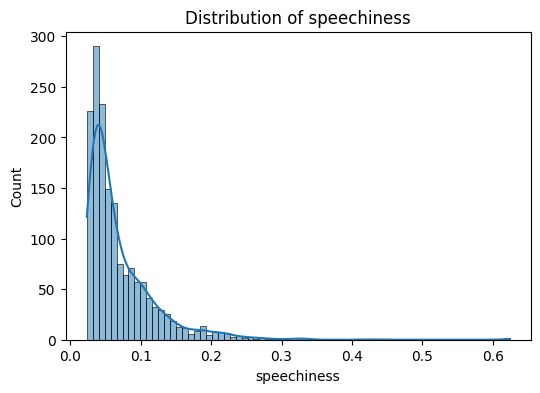

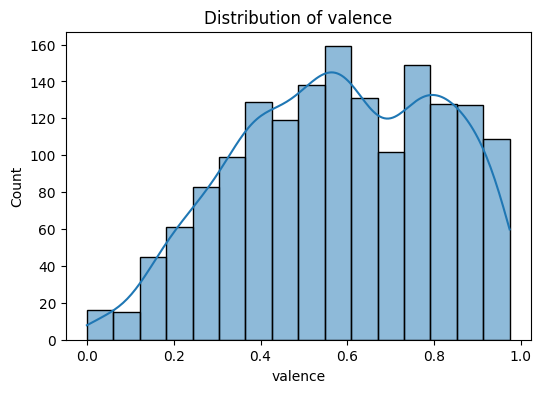

In [66]:
# Distribution of song features
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

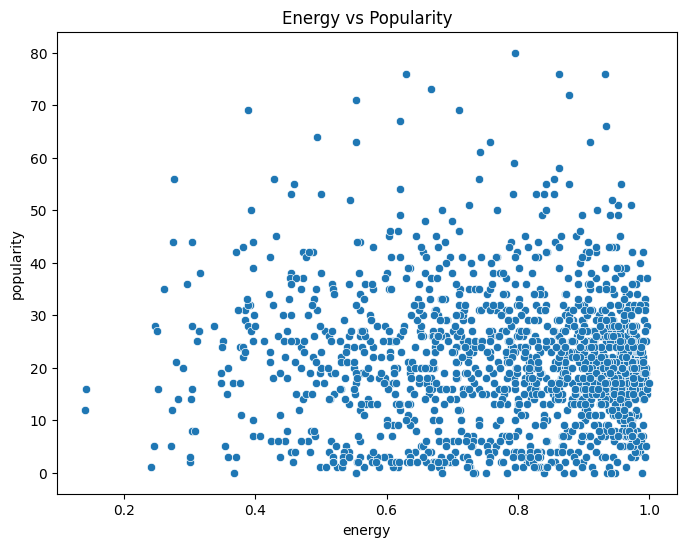

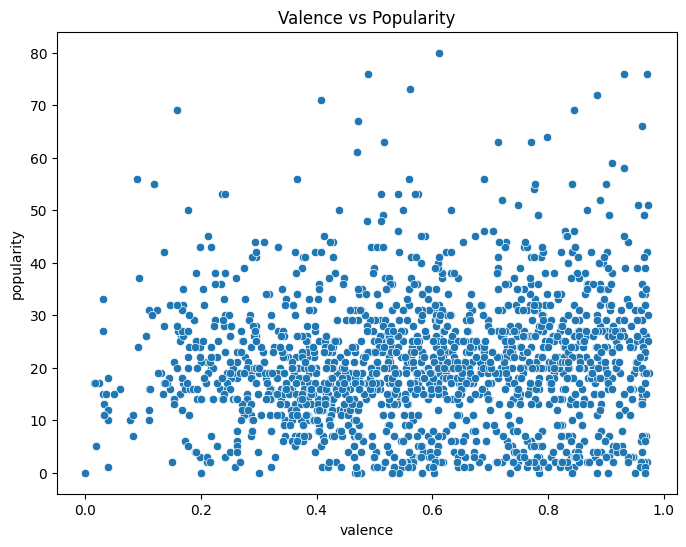

In [67]:
# Popularity vs Energy, Valence, Danceability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='energy', y='popularity', data=df_clean)
plt.title("Energy vs Popularity")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='valence', y='popularity', data=df_clean)
plt.title("Valence vs Popularity")
plt.show()

Explained variance by PCA: [0.27031779 0.12812942]


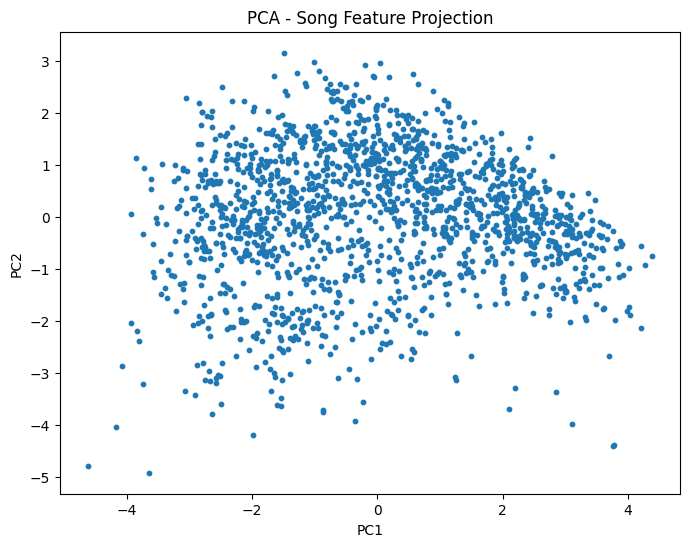

In [68]:
# Step 5: Dimensionality Reduction (PCA)
features_for_clustering = df_clean.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_clustering)

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance by PCA: {pca.explained_variance_ratio_}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10)
plt.title("PCA - Song Feature Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

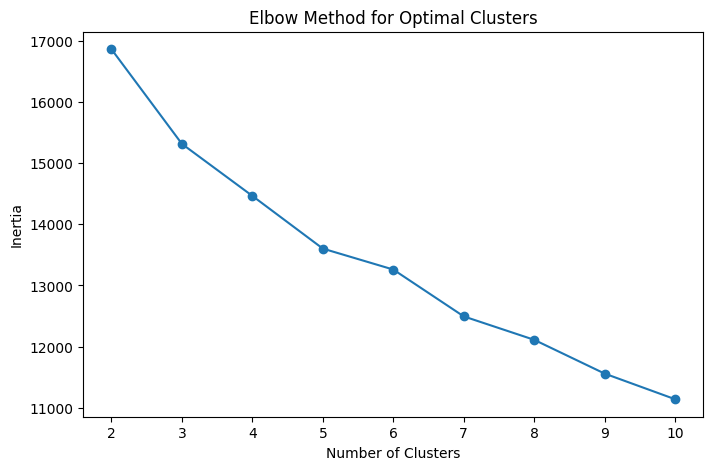

Silhouette Score for k=2: 0.1825
Silhouette Score for k=3: 0.1377
Silhouette Score for k=4: 0.1283
Silhouette Score for k=5: 0.1285


In [69]:
# Step 6: Clustering (KMeans)
# Elbow method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette scores
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Choose optimal k (e.g., 4)
kmeans_final = KMeans(n_clusters=4, random_state=42)
df_clean['cluster'] = kmeans_final.fit_predict(X_scaled)

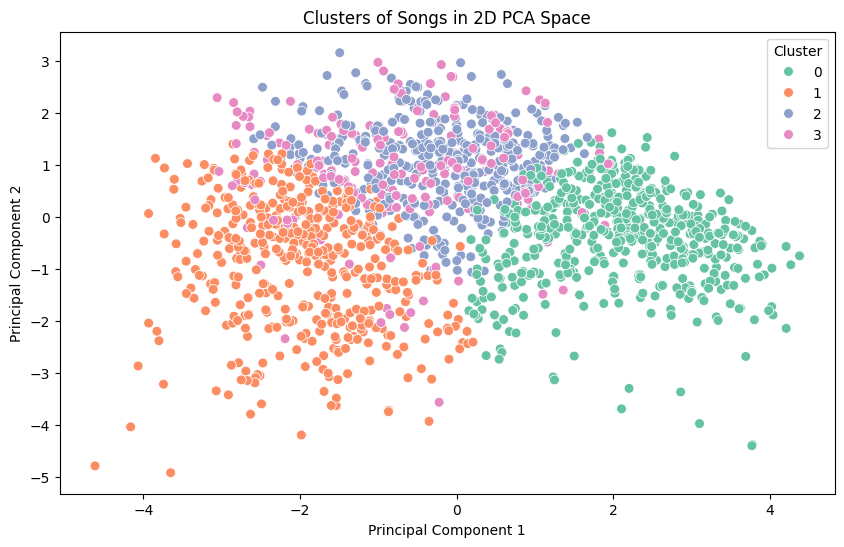

In [70]:
# Step 7: Visualize Clusters
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=df_clean['cluster'], palette='Set2', s=50)
plt.title("Clusters of Songs in 2D PCA Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

In [71]:
# Step 8: Cluster Interpretation
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
cluster_summary = df_clean.groupby('cluster')[numeric_cols].mean()
print(cluster_summary)

          Unnamed: 0  track_number  acousticness  danceability    energy  \
cluster                                                                    
0         450.632270     11.422139      0.216153      0.354664  0.908206   
1        1204.741071      7.102679      0.368515      0.538478  0.575911   
2         739.324009      7.216783      0.160042      0.520065  0.862317   
3         990.820000      7.510000      0.271511      0.507410  0.818355   

         instrumentalness  liveness   loudness  speechiness       tempo  \
cluster                                                                   
0                0.120060  0.857941  -5.574683     0.106672  134.560462   
1                0.055210  0.229203 -10.034757     0.047490  118.345478   
2                0.061871  0.352418  -5.475676     0.054474  125.055117   
3                0.745225  0.402662  -7.041790     0.052070  123.019640   

          valence  popularity    duration_ms  cluster  
cluster                             

In [72]:
# Describe each cluster's key characteristics
for cluster_id, row in cluster_summary.iterrows():
    print(f"\n🎧 Cluster {cluster_id}:")
    print(row.sort_values(ascending=False).head(3))  # Top 3 defining features



🎧 Cluster 0:
duration_ms    317279.936210
Unnamed: 0        450.632270
tempo             134.560462
Name: 0, dtype: float64

🎧 Cluster 1:
duration_ms    225204.477679
Unnamed: 0       1204.741071
tempo             118.345478
Name: 1, dtype: float64

🎧 Cluster 2:
duration_ms    242472.165501
Unnamed: 0        739.324009
tempo             125.055117
Name: 2, dtype: float64

🎧 Cluster 3:
duration_ms    204666.87500
Unnamed: 0        990.82000
tempo             123.01964
Name: 3, dtype: float64
